# Robustness checks presentation

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [5]:
os.getcwd()

'd:\\MA\\MasterThesis\\ANALYSIS'

## Varying peace agreement TH for dummy 


In [22]:
def read_dep_var(loc, varname,dp): 
    if dp:
        df=pd.read_csv(f'{loc}\TH_var_results_dp_{varname}.csv',header=1,index_col=0)
    else:
        df=pd.read_csv(f'{loc}\TH_var_results_{varname}.csv',header=1,index_col=0) 
    years = [2014, 2015, 2016, 2017, 2018]  # The years in the dataset
    new_cols = []
    for year in years:
        new_cols.append((year, "b"))
        new_cols.append((year, "ci95"))

    # Set the new MultiIndex columns
    df.columns = pd.MultiIndex.from_tuples(new_cols, names=["year", "measure"])

    # Convert the MultiIndex columns into a long format
    df_long = df.stack(level=0).reset_index()

    # Rename the columns to make them clearer
    df_long = df_long.rename(columns={"level_0": "variable", "year": "year"})

    # Split the 'ci95' column into 'ci_lower' and 'ci_upper'
    df_long[["ci_lower", "ci_upper"]] = df_long["ci95"].str.split(",", expand=True).astype(float)

    # Drop the old 'ci95' column
    df_long = df_long.drop(columns=["ci95"])

    return df_long

In [42]:

def plot_TH(vars,dic,name_outfile,dp):
    # get how many plots
    plots_n=len(vars)
    # Set up figure and axes
    cap_width = 0.1
    fig= plt.figure(figsize=(15, 3.5*plots_n))
    for index, varname in enumerate(vars):
        df_long=df_long=read_dep_var(dic,varname,dp)
        # Filter data
        coffee_df = df_long[df_long["variable"].str.contains("coffee")]
        oil_df = df_long[df_long["variable"].str.contains("oil")]

        
        # Plot for oil
        ax2 = fig.add_subplot(plots_n, 2, 2*index+1)
        sns.lineplot(data=oil_df, x="year", y="b", ax=ax2, label="Coefficient", marker="o",color="mediumblue")
        # Add vertical error bars for confidence intervals
        for i, year in enumerate(oil_df["year"]):
            ax2.plot([year, year], 
                        [oil_df["ci_lower"].iloc[i], oil_df["ci_upper"].iloc[i]], 
                        color='blue', alpha=0.5)
                # Lower cap
            ax2.plot([year - cap_width/2, year + cap_width/2], 
                        [oil_df["ci_lower"].iloc[i], oil_df["ci_lower"].iloc[i]], 
                        color='blue', alpha=0.5)
            # Upper cap
            ax2.plot([year - cap_width/2, year + cap_width/2], 
                        [oil_df["ci_upper"].iloc[i], oil_df["ci_upper"].iloc[i]], 
                        color='blue', alpha=0.5)
        ax2.axhline(0, color="red", linestyle="--")
        ax2.set_title(f"Oil Coefficients for {varname}",fontsize=20,fontweight='bold')
        ax2.set_xlabel("Cutoff Year",color='black',fontsize=16)
        ax2.set_ylabel("Coefficient",color='black',fontsize=16)
        # Set x-ticks as integers
        ax2.set_xticks([2014, 2015, 2016, 2017, 2018])
        ax2.set_xticklabels([2014, 2015, 2016, 2017, 2018], fontsize=14)
        ax2.tick_params(axis='y', labelcolor='black',labelsize=14)
        
        # Plot for coffee
        ax1 = fig.add_subplot(plots_n, 2, 2*index+2)
        sns.lineplot(data=coffee_df, x="year", y="b", ax=ax1, label="Coefficient", marker="o",color="mediumblue")
        # Add vertical error bars for confidence intervals
        for i, year in enumerate(coffee_df["year"]):
            ax1.plot([year, year], 
                        [coffee_df["ci_lower"].iloc[i], coffee_df["ci_upper"].iloc[i]], 
                        color='blue', alpha=0.5)
                # Lower cap
            ax1.plot([year - cap_width/2, year + cap_width/2], 
                        [coffee_df["ci_lower"].iloc[i], coffee_df["ci_lower"].iloc[i]], 
                        color='blue', alpha=0.5)
            # Upper cap
            ax1.plot([year - cap_width/2, year + cap_width/2], 
                        [coffee_df["ci_upper"].iloc[i], coffee_df["ci_upper"].iloc[i]], 
                        color='blue', alpha=0.5)
        ax1.axhline(0, color="red", linestyle="--")
        ax1.set_title(f"Coffee Coefficients for {varname}",fontsize=20,fontweight='bold')
        ax1.set_xlabel("Cutoff year",color='black',fontsize=16)
        ax1.set_ylabel("Coefficient",color='black',fontsize=16)
        # Set x-ticks as integers
        ax1.set_xticks([2014, 2015, 2016, 2017, 2018])
        ax1.set_xticklabels([2014, 2015, 2016, 2017, 2018], fontsize=14)
        ax1.tick_params(axis='y', labelcolor='black',labelsize=14)

    # Adjust layout
    plt.tight_layout(h_pad=2,w_pad=2)
    plt.savefig(f'Graphs/{name_outfile}.png', dpi=300, bbox_inches='tight')

### DiD Approach

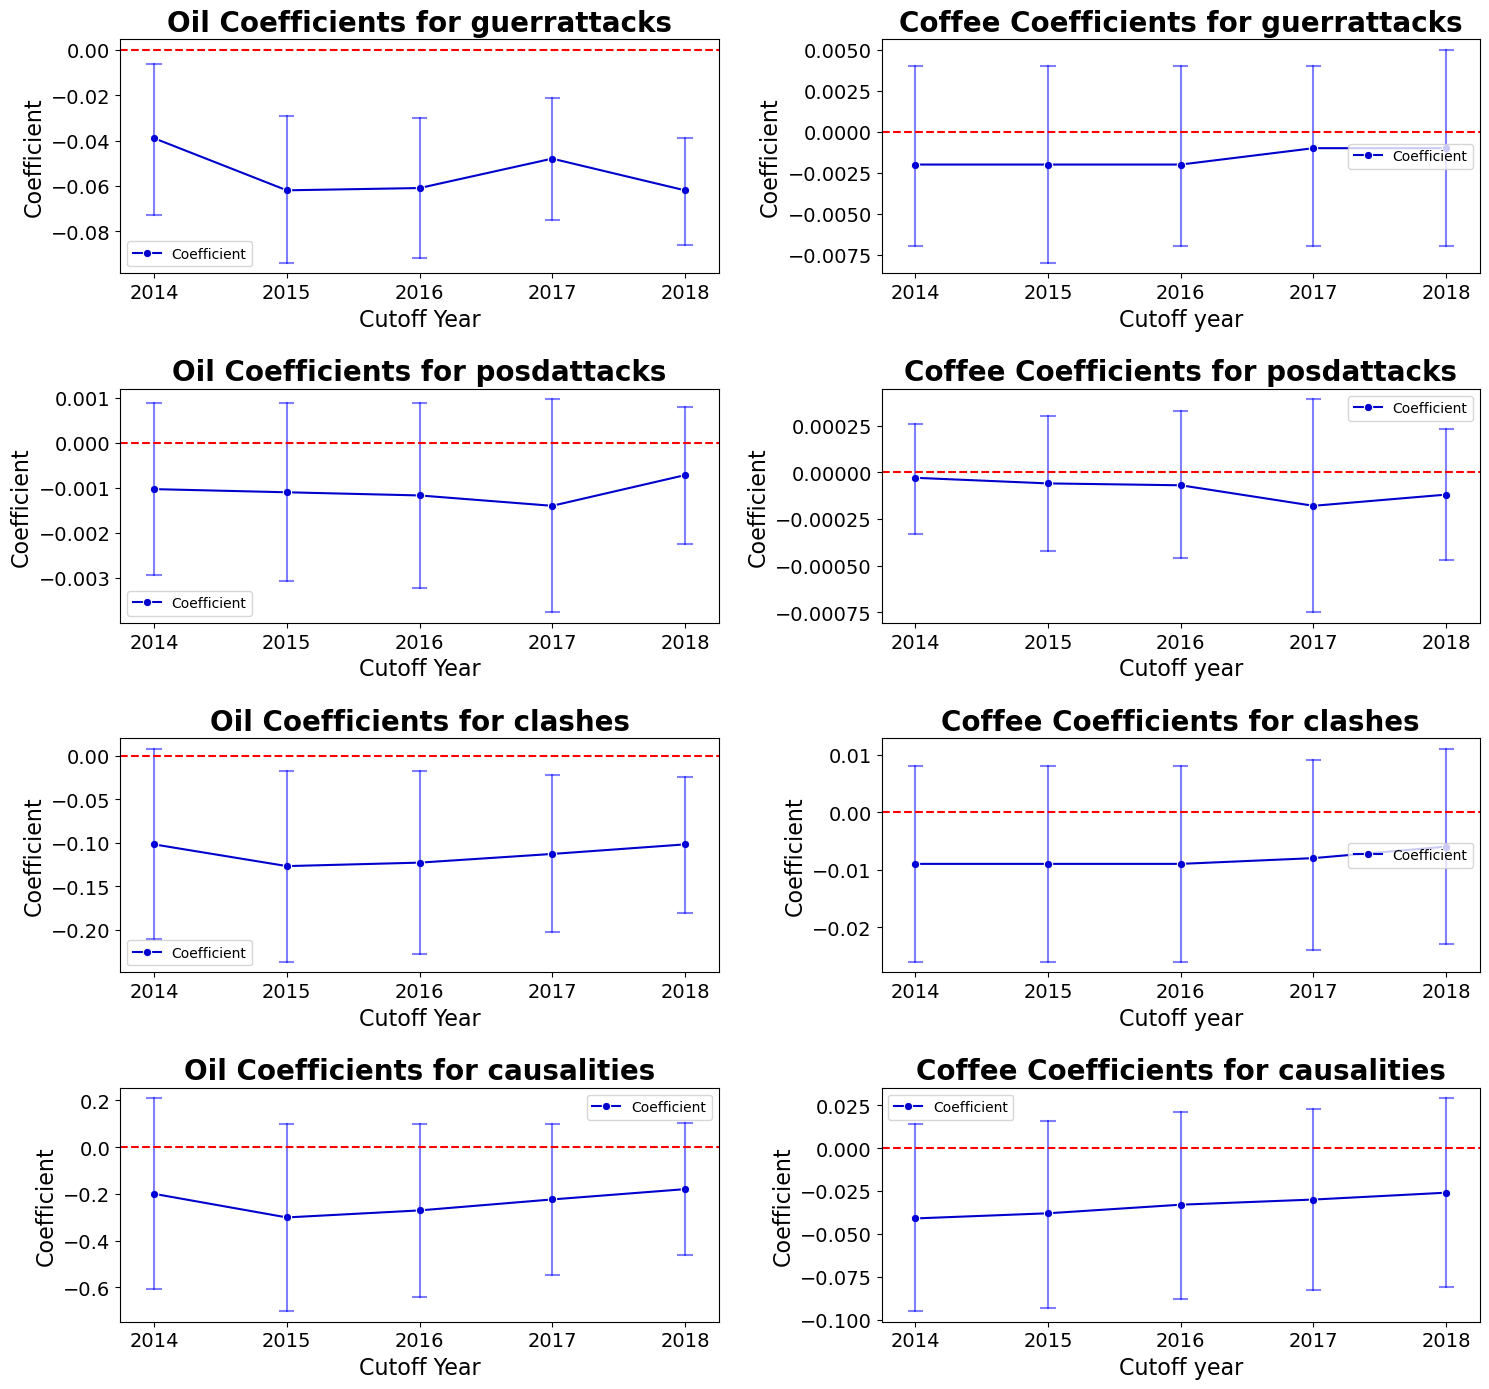

In [43]:
vars=vars=['guerrattacks','posdattacks','clashes','causalities']
plot_TH(vars=vars,dic='Tables\Robustness\Threshold\DiD',name_outfile='DiDTH',dp=False)

### Dynamic Panel

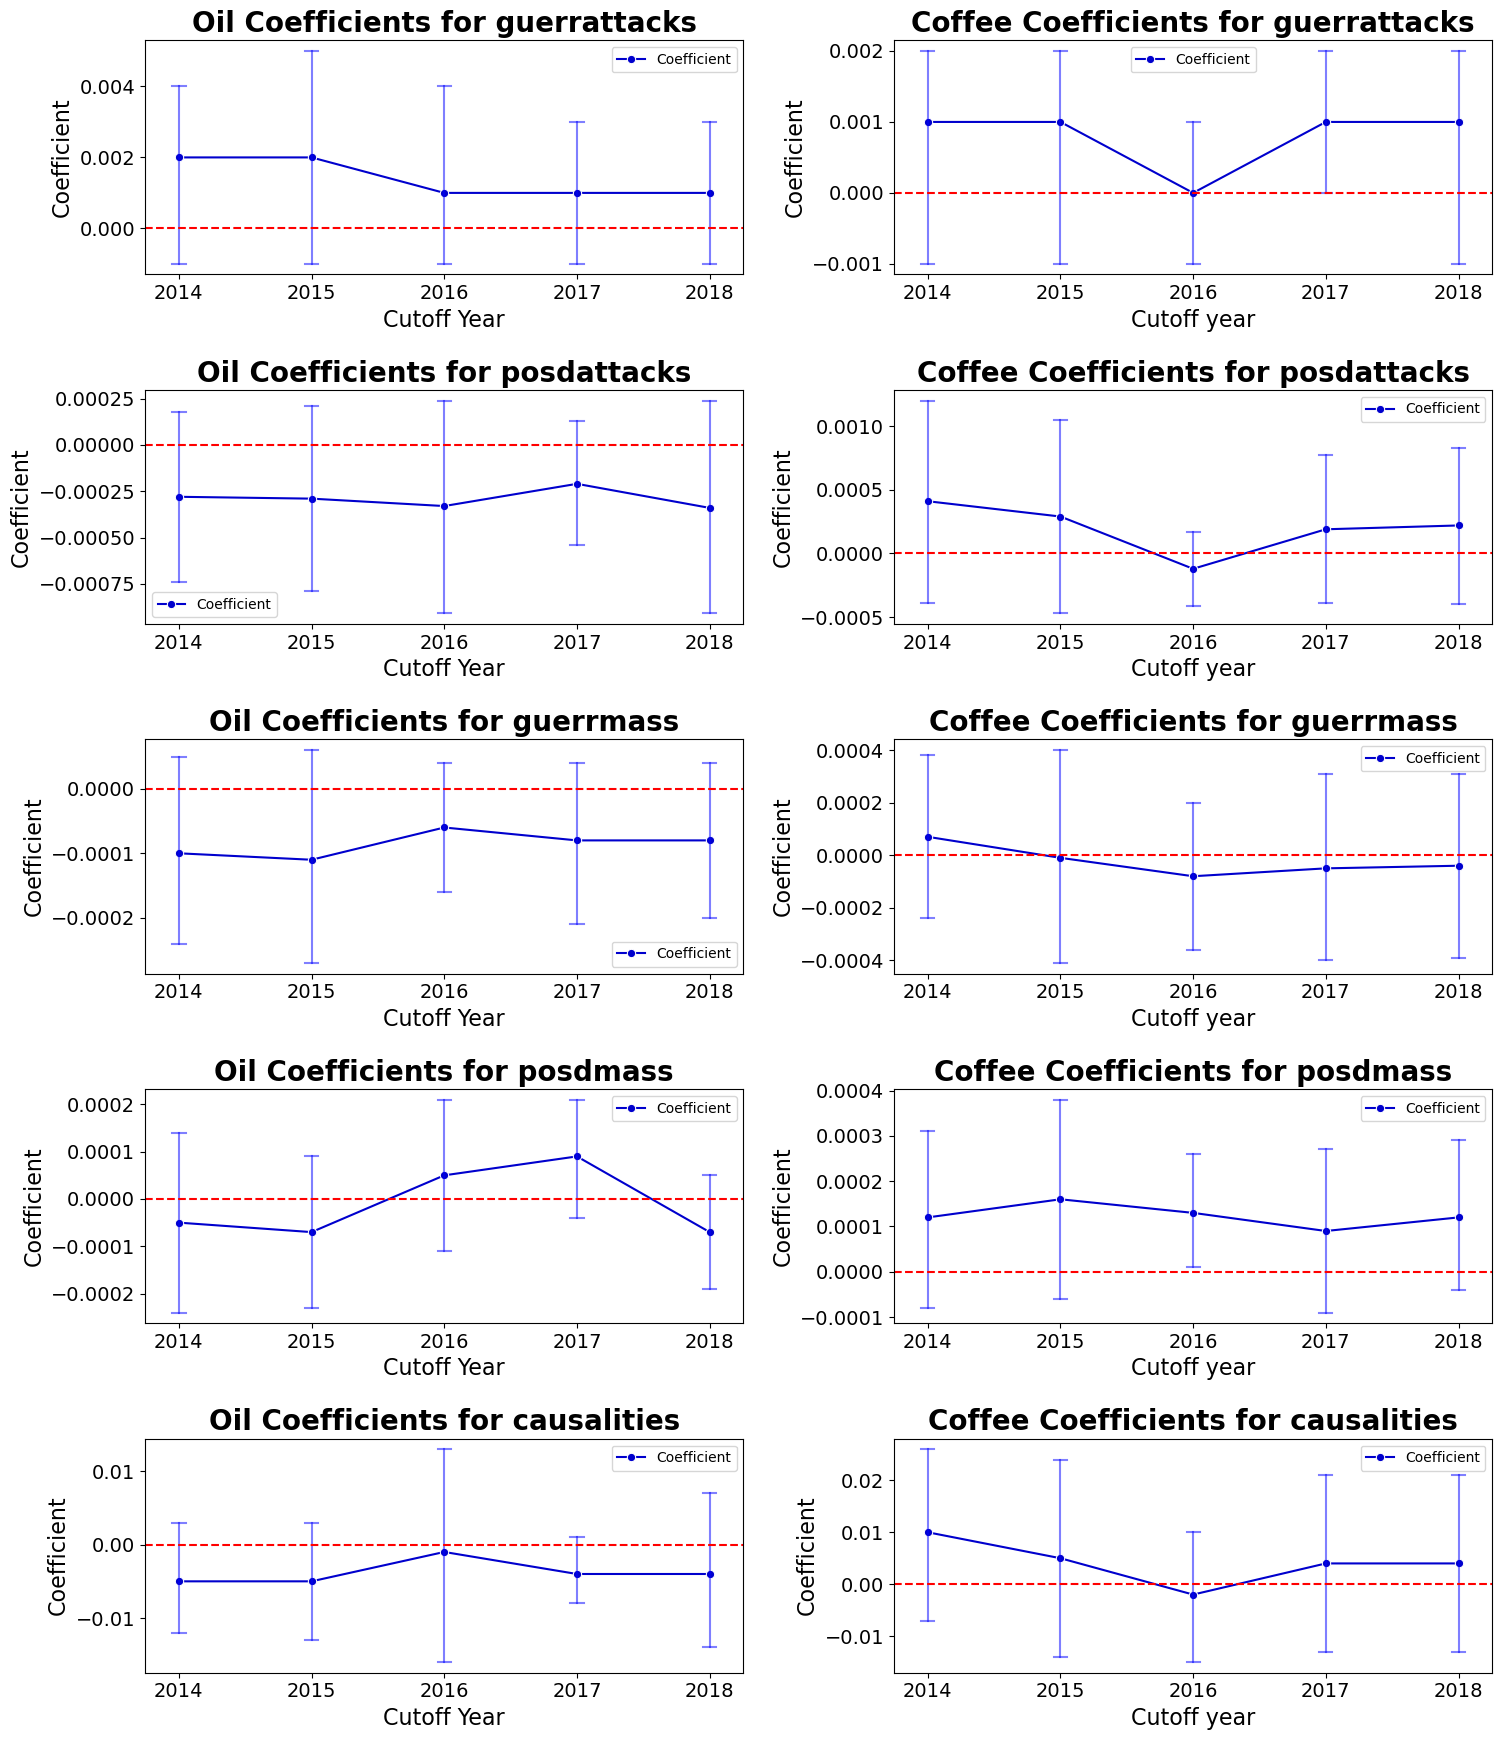

In [44]:
varsdyn=['guerrattacks', 'posdattacks','guerrmass','posdmass','causalities']
plot_TH(vars=varsdyn,dic='Tables\Robustness\Threshold\Dynamic Panel',name_outfile='DPTH',dp=True)